使用sample code 下載訓練資料

In [0]:
from PIL import Image
import numpy as np



先下載 MNIST 資料


In [0]:
import os
import urllib
from urllib.request import urlretrieve
dataset = 'mnist.pkl.gz'
def reporthook(a,b,c):
    print("\rdownloading: %5.1f%%"%(a*b*100.0/c), end="")
    
if not os.path.isfile(dataset):
        origin = "https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz"
        print('Downloading data from %s' % origin)
        urlretrieve(origin, dataset, reporthook=reporthook)

In [0]:
import gzip
import pickle
with gzip.open(dataset, 'rb') as f:
    train_set, validation_set, test_set = pickle.load(f, encoding='latin1')

In [0]:
# 設定好訓練及測試資料
train_X, train_y = train_set
test_X, test_y = test_set
# 設定成我們的格式
train_X = train_X[..., None]
test_X = test_X[..., None]


In [101]:
# 有 10 種類別，輸入的是 784 維
print(train_X.shape)
print(np.unique(train_y))

(50000, 784, 1)
[0 1 2 3 4 5 6 7 8 9]


In [102]:
from IPython.display import display
def showX(X):
    int_X = (X*255).clip(0,255).astype('uint8')
    # N*784 -> N*28*28 -> 28*N*28 -> 28 * 28N
    int_X_reshape = int_X.reshape(-1,28,28).swapaxes(0,1).reshape(28,-1)
    display(Image.fromarray(int_X_reshape))
# 訓練資料， X 的前 20 筆
print(train_y[:20])
showX(train_X[:20])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [103]:
#改成mean square error算法
#由於效果差更改成兩層(有可能是微分寫錯或是mean square error不適合)
# 參考範例 softmax regression
W = np.random.normal(size=(10, 784))
b = np.random.normal(size=(10, 1))
n_data = train_X.shape[0]
# 紀錄 loss
loss_history = []
accuracy_history = []
best_accuracy = 0
for epoch in range(5001):    
    idx = np.random.choice(n_data, 300, replace=False)
    X = train_X[idx]
    y = train_y[idx]
    one_y = np.eye(10)[y][..., None]
    #d = np.exp(W @ X + b)
    d = W @ X + b
    q = d/d.sum(axis=(1,2), keepdims=True) 
    #loss = -np.log(q[range(len(y)), y]).mean()
    ####更改計算loss
    loss = ((q-one_y)**2).mean()
    #print("loss",loss)
    ####
    loss_history.append(loss)
    accuracy = (q.argmax(axis=1).ravel() == y).mean()
    accuracy_history.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
    if epoch%100 == 0:
        #print(epoch,best_accuracy, loss)
        print(epoch, accuracy, loss)
    #grad_b_all = q - one_y
    grad_b_all = (2*(q - one_y)**2)/10
    #print("grad_b_all",grad_b_all)
    grad_b = grad_b_all.mean(axis=0)
    grad_W_all = grad_b_all @ X.swapaxes(1,2)
    grad_W = grad_W_all.mean(axis=0)
    W -= grad_W
    b -= grad_b    

0 0.06333333333333334 7114.793682930584
100 0.13333333333333333 0.09657066863876612
200 0.09333333333333334 0.09774193237143443
300 0.09333333333333334 0.09740155874264603
400 0.08666666666666667 0.09834414449186514
500 0.10666666666666667 0.09669292996991553
600 0.09333333333333334 0.09809779767525476
700 0.10666666666666667 0.09727825188113724
800 0.10666666666666667 0.09723198232120074
900 0.09666666666666666 0.09757570711560089
1000 0.09 0.09570612926317819
1100 0.09666666666666666 0.0969652429592638
1200 0.08 0.09856693081173803
1300 0.11 0.09687768475914364
1400 0.12333333333333334 0.09711841586250891
1500 0.08333333333333333 0.09980512201670563
1600 0.09333333333333334 0.09675459106600101
1700 0.08666666666666667 0.09733244760950827
1800 0.09333333333333334 0.0967524322655739
1900 0.11666666666666667 0.0968775541418577
2000 0.10666666666666667 0.09653885268983914
2100 0.09 0.0975484620644277
2200 0.10333333333333333 0.09702641987009017
2300 0.1 0.09670192795607144
2400 0.1 0.096

In [111]:
#改成兩層測試  效果一樣差: (
k =0.03
A = np.random.normal(size=(20, 784))
B = np.random.normal(size=(20, 1))
E = np.random.normal(size=(10, 20))
F = np.random.normal(size=(10, 1))
n_data = train_X.shape[0]
loss_history = []
accuracy_history = []
best_accuracy = 0
for epoch in range(5000):    
    idx = np.random.choice(n_data, 300, replace=False)
    X = train_X[idx]
    y = train_y[idx]
    one_y = np.eye(10)[y][..., None]
    C = A @ X + B ##(20*1)
    D = E @ C + F ##(10*1)
    G =  np.exp(D)
    #C = np.exp(A @ X + B)
    #d = W @ X + b
    q = G/G.sum(axis=(1,2), keepdims=True) 
    #print(q)
    #loss = -np.log(q[range(len(y)), y]).mean()
    ####更改計算loss
    loss = (((q-one_y)**2)/10).mean()
    #print("loss",loss)
    ####
    loss_history.append(loss)
    accuracy = (q.argmax(axis=1).ravel() == y).mean()
    accuracy_history.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
    if epoch%100 == 0:
        #print(epoch,best_accuracy, loss)
        print(epoch, accuracy, loss)
    #grad_b_all = q - one_y
    grad_F_all = (2*(q - one_y)**2)/10
    #print("grad_b_all",grad_b_all)
    grad_F = grad_F_all.mean(axis=0)
    
    #grad_C = E.swapaxes(1,2) @ grad_F
    grad_C = E.T @ grad_F
    
    grad_E = grad_F @ grad_C.T
    
    grad_B = grad_C
    
    grad_A = grad_C @ X[0].T
    
    F -= k* grad_F
    C -= k* grad_C
    E -= k* grad_E
    B -= k* grad_B
    A -= k* grad_A
    

0 0.11666666666666667 0.0173596831431228
100 0.13 0.017094640794229714
200 0.11666666666666667 0.017359169988099717
300 0.12666666666666668 0.017143922506403512
400 0.09666666666666666 0.017641381348562524
500 0.1 0.017682339691744122
600 0.09333333333333334 0.01776916784146744
700 0.1 0.01766114058969395
800 0.11 0.017372716482412637
900 0.09666666666666666 0.017613609518303663
1000 0.09 0.017859151204350568
1100 0.09666666666666666 0.017688833732184866
1200 0.10333333333333333 0.01753513205323338
1300 0.09 0.017781342407244438
1400 0.13666666666666666 0.016701086750041862
1500 0.1 0.017635331928430725
1600 0.1 0.01757004481762957
1700 0.10333333333333333 0.01758922260063888
1800 0.09666666666666666 0.017649081160679585
1900 0.07 0.018219826457315097
2000 0.14666666666666667 0.016698455061541807
2100 0.11666666666666667 0.017196839593434377
2200 0.11 0.01742160238822102
2300 0.09 0.01777977652275655
2400 0.06666666666666667 0.018323134917838105
2500 0.10333333333333333 0.0174599981860

In [105]:
    idx = np.random.choice(n_data, 300, replace=False)
    X = train_X[idx]
    y = train_y[idx]
    print(X[1].shape)
    print(y[:2])

(784, 1)
[0 7]


In [106]:
# test data 的正確率
((W @ test_X + b).argmax(axis=1).ravel() == test_y).mean()

0.0397

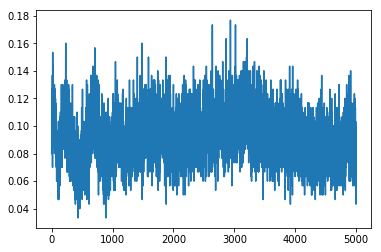

In [107]:
%matplotlib inline
import matplotlib.pyplot as plt
# 準確率的圖
plt.plot(accuracy_history);

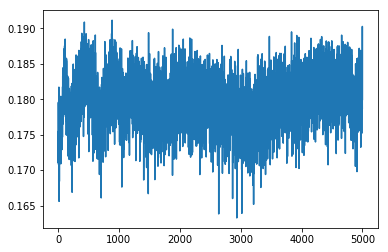

In [108]:
# loss 的圖
plt.plot(loss_history);

In [0]:
def softmax(x):
    t = np.exp(x)
    return t/t.sum(axis=(-2,-1),keepdims=True)
def relu(x):
    return np.maximum(x, 0)
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 微分
def Drelu(x):
    return (x>0).astype('float32')
def Dsigmoid(x):
    q = sigmoid(x)
    return q * (1-q) 
    # or 
    #return np.exp(x)/(1+np.exp(-x))**2